# Credit Risk Modelling

##Predicting load default

In [ ]:
# @ auther:
# @ date :
# @ modification log
#----------------------------------------------------------------------------------------------------------------------
# Date              Description
#------------------------------------------------------------------------------------------------------------------

In [143]:
import os

In [144]:
os.getcwd()

'C:\\Users\\OWNER\\Documents\\GitHub\\CaseStudy'

In [145]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [146]:
train = pd.read_csv('data/train_loanDefault.csv')
test = pd.read_csv('data/test_loanDefault.csv')

In [147]:
train.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,NaN,NaN,NaN
50%,3786.000000,1025.000000,NaN,NaN,NaN
75%,5060.000000,2430.500000,NaN,NaN,NaN
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [148]:
train.count()

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

Our first aim is to look for no or rows in dataset

Next immidiately look for data disctionary, if not given create one.

In [149]:
train.head()
print("Number of rows =%d", %len(train))
print("Number of cols =%d", %len(train.columns))

# Data type of no of rows and no of columns could spill over int64 but it will never be -ve i.e. signed so data type 
# could be un-signed integer use of %d can be replaced
print("Number of rows =%d and cols =%d", %(train.shape[0], train.shape[1])

SyntaxError: invalid syntax (<ipython-input-149-c2f65534ea15>, line 2)

In [150]:
# get data describtion of categorical -

train.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP002745,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


In [151]:
# as sel_employed has some missing values so value count will not match to total row count
print("Self_Employed : ", train['Self_Employed'].value_counts(dropna=False))
print("LoanAmount : ", train['LoanAmount'].value_counts(dropna=False))
print("Loan_Amount_Term : ", train['Loan_Amount_Term'].value_counts(dropna=False))


Self_Employed :  No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64
LoanAmount :   150.0    12
 125.0    11
 110.0    10
 187.0     9
 90.0      9
 100.0     9
 120.0     9
 108.0     8
 130.0     8
 135.0     7
 80.0      6
 160.0     5
 185.0     5
 176.0     5
 131.0     5
 200.0     5
 104.0     5
 122.0     5
NaN        5
 140.0     4
 138.0     4
 143.0     4
 123.0     4
 102.0     4
 65.0      4
 117.0     4
 116.0     4
 105.0     4
 152.0     4
 180.0     4
          ..
 232.0     1
 189.0     1
 192.0     1
 197.0     1
 199.0     1
 225.0     1
 208.0     1
 209.0     1
 240.0     1
 159.0     1
 157.0     1
 155.0     1
 297.0     1
 109.0     1
 290.0     1
 112.0     1
 213.0     1
 280.0     1
 121.0     1
 275.0     1
 257.0     1
 412.0     1
 256.0     1
 137.0     1
 141.0     1
 142.0     1
 254.0     1
 151.0     1
 153.0     1
 460.0     1
Name: LoanAmount, dtype: int64
Loan_Amount_Term :   360.0    311
 180.0     22
 480.0      8
 300.0      7
Na

In [152]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Observations -
1. Loan amount has ( 614 - 592 = ) 22 missing values
2. Loan amount Term has 14 missing values
3. Credit history has 50 missing values
4. About 84 % of candidate has credit history
5. ApplicantsIncome and co applicant income data need to be studied for its distribution

In [153]:
train.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,NaN,NaN,NaN
50%,3786.000000,1025.000000,NaN,NaN,NaN
75%,5060.000000,2430.500000,NaN,NaN,NaN
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [154]:
import pandas as pd

from bokeh.layouts import gridplot
from bokeh.charts import Line, show, output_file, defaults

defaults.plot_width = 450
defaults.plot_height = 400
line = Line(train)
line0 = Line(train, y=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
             title="Interpreters (y=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])", ylabel='Amount', legend=True)

output_file("line_multi.html", title="line examples")

show(gridplot( line0, ncols=1))

INFO:bokeh.core.state:Session output file 'line_multi.html' already exists, will be overwritten.


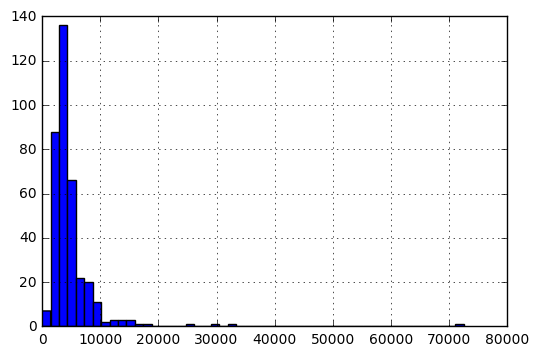

In [155]:
%matplotlib inline
train['ApplicantIncome'].hist(bins=50)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x10556e48>],
 'caps': [<matplotlib.lines.Line2D at 0x105b2828>,
 'fliers': [<matplotlib.lines.Line2D at 0x105b3fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x105b3208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10560898>,
  <matplotlib.lines.Line2D at 0x10560fd0>]}

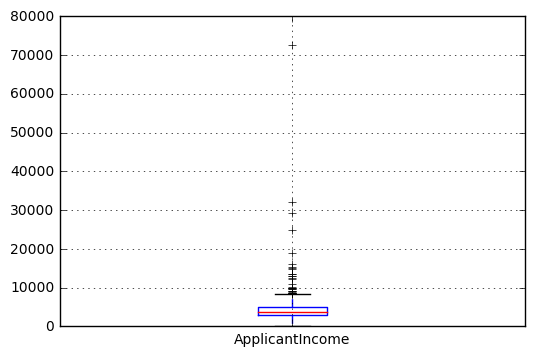

In [156]:
train.boxplot(column='ApplicantIncome')


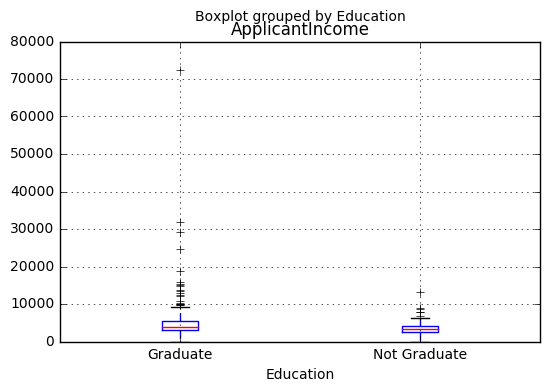

In [157]:
train.boxplot(column='ApplicantIncome', by='Education')

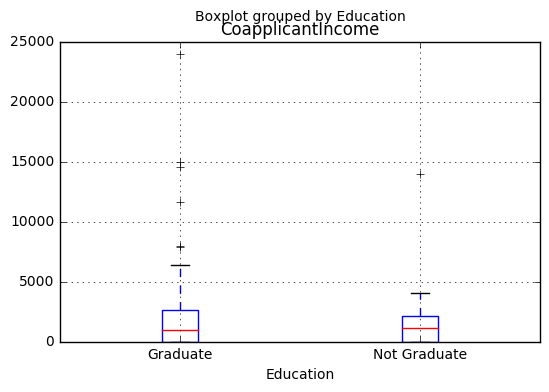

In [158]:
train.boxplot(column='CoapplicantIncome', by='Education')

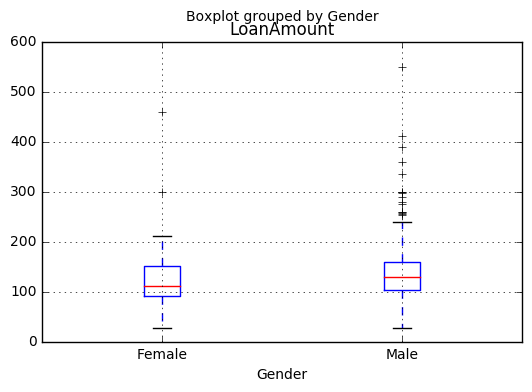

In [159]:
train.boxplot(column='LoanAmount', by='Gender')

As there are more males who took large loan than female

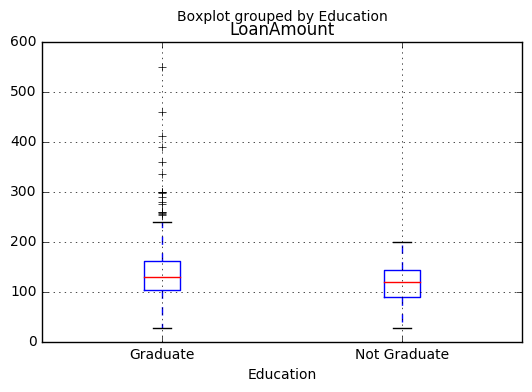

In [160]:
train.boxplot(column='LoanAmount', by='Education')

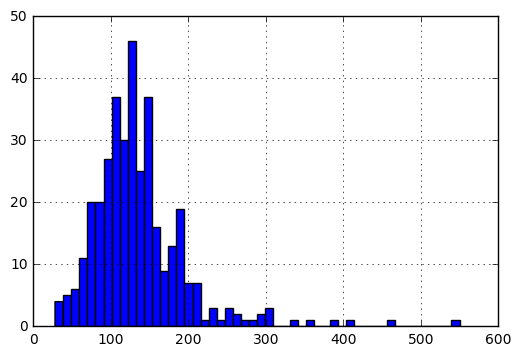

In [161]:
train['LoanAmount'].hist(bins=50)

In [162]:
temp1 = train['Credit_History'].value_counts(ascending= True)

In [163]:
temp2 = train.pivot_table(values = 'Loan_Status', index=['Credit_History'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())

In [164]:
print("Frequency table of Credit History : ")
print( temp1)
print('Probability of getting loan for each credit history class : ')
print(temp2)

Frequency table of Credit History : 
0.0     59
1.0    279
Name: Credit_History, dtype: int64
Probability of getting loan for each credit history class : 
Empty DataFrame
Columns: []
Index: []


TypeError: Empty 'DataFrame': no numeric data to plot

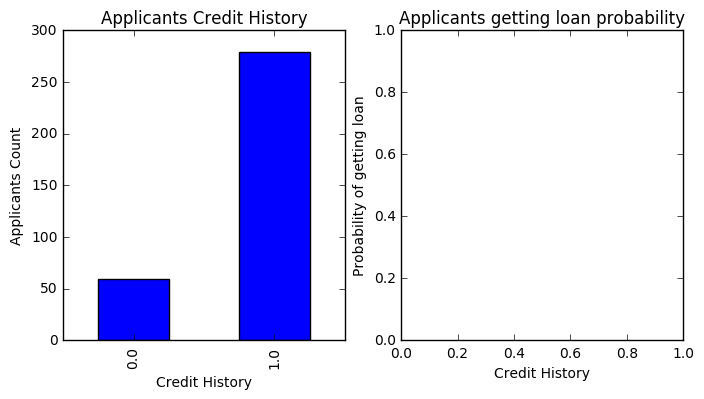

In [165]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Applicants Count')
ax1.set_title('Applicants Credit History')
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Applicants getting loan probability')
temp2.plot(kind='bar')


Above 2 plots can be combined in one single plot using crosstab

In [ ]:
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked = True, color=['red','blue'],grid=False)

In [ ]:
temp3 = pd.crosstab(train['Credit_History'], train['Gender'])
temp3.plot(kind='bar', stacked = True, color=['red','blue'],grid=False)

In [ ]:
temp4 = pd.crosstab([train['Credit_History'],train['Gender']], train['Loan_Status'])
temp4.plot(kind='bar', stacked = True, color=['red','blue'],grid=False)

## Data Munging
Cleaning data here

In [ ]:
train.apply(lambda x:sum(x.isnull()), axis=0)

In [ ]:
#Imputing missing loan amount values

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)

In [166]:
train.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Loanamount is replaced.

In [167]:
train['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [168]:
#Impute  Self_Employed
train['Self_Employed'].fillna('No', inplace = True)

In [169]:
table = train.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)

table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,120.0
Yes,137.0,119.0


In [198]:
#This fnction will return values from above pivote avle for given x
def fage(x):
    if x['Self_Employed'].isnull() & x['Education'].isnotnull() :
        return table.loc(x['Self_Employed'], x['Education'])


In [199]:
train[:1]

type(fage(train[:1]))

AttributeError: 'Series' object has no attribute 'isnotnull'

In [172]:
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage,axis=1), inplace=True)

TypeError: ("'bool' object is not callable", 'occurred at index 78')

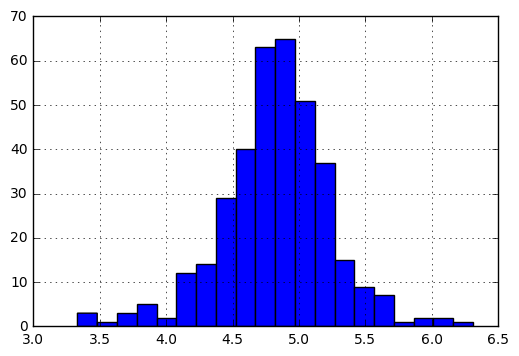

In [173]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

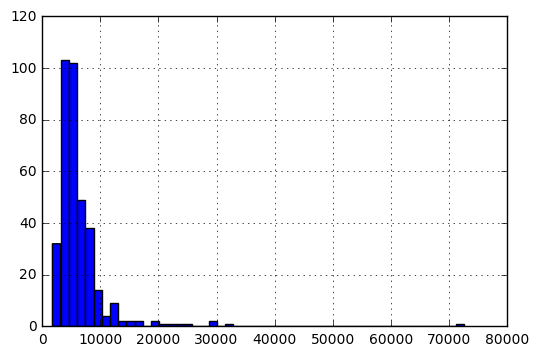

In [174]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome'].hist(bins=50)

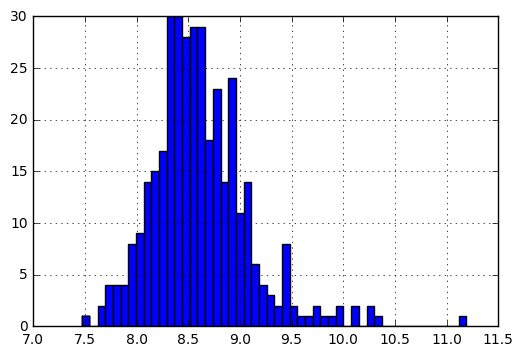

In [175]:
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=50)

In [176]:
# Impute missing values for gender, married, loan amount term, Dependents, credit_history

# As majority of gender is male fill na with male, same for self employed
# Loan amount term by majority terms
# Credit history will fill with 1 as it is majority


In [177]:
train['Gender'].fillna('Male', inplace = True)

In [178]:
train['Self_Employed'].fillna('No', inplace = True)

In [179]:
train['Married'].fillna('Yes', inplace = True)

In [180]:
train['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [181]:
train['Dependents'].fillna('0', inplace = True)

In [184]:
train['Credit_History'].fillna(1, inplace=True)

In [182]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

In [183]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log',
       'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [187]:
print(train['Loan_Amount_Term'].value_counts())
print(train['Loan_Amount_Term'].median())

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
350.0      1
120.0      1
60.0       1
36.0       1
12.0       1
6.0        1
Name: Loan_Amount_Term, dtype: int64
360.0


In [188]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace =True)